In [49]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# DATA COLLECTION

In [50]:
#Read Datasets
data_business = pd.read_csv('business.csv')
data_economy = pd.read_csv('economy.csv')
#Add a column called Class
data_business['class']='Business'
data_economy['class']='Economy'
#Concatenate both datasets
data=pd.concat([data_economy,data_business],axis=0)
#Replace column stop with Number of stop
data['Number of Stops']= data['stop'].str.slice(start=0, stop=1).replace('n','0')
df = pd.DataFrame(data)
df = df.drop(columns=['stop'])
#Add Serial Number
df.insert(0,' Sl no.', range(1, len(df) + 1))
#Drop unneccessary column
df= df.drop(columns=['date'])

#fixing the index
df=df.reset_index()
df=df.drop(columns=[' Sl no.','index'])
df

,airline,ch_code,num_code,dep_time,from,time_taken,arr_time,to,price,class,Number of Stops
0,SpiceJet,SG,8709,18:55,Delhi,02h 10m,21:05,Mumbai,"5,953",Economy,0
1,SpiceJet,SG,8157,06:20,Delhi,02h 20m,08:40,Mumbai,"5,953",Economy,0
2,AirAsia,I5,764,04:25,Delhi,02h 10m,06:35,Mumbai,"5,956",Economy,0
3,Vistara,UK,995,10:20,Delhi,02h 15m,12:35,Mumbai,"5,955",Economy,0
4,Vistara,UK,963,08:50,Delhi,02h 20m,11:10,Mumbai,"5,955",Economy,0
...,...,...,...,...,...,...,...,...,...,...,...
300256,Vistara,UK,822,09:45,Chennai,10h 05m,19:50,Hyderabad,"69,265",Business,1
300257,Vistara,UK,826,12:30,Chennai,10h 25m,22:55,Hyderabad,"77,105",Business,1
300258,Vistara,UK,832,07:05,Chennai,13h 50m,20:55,Hyderabad,"79,099",Business,1
300259,Vistara,UK,828,07:00,Chennai,10h 00m,17:00,Hyderabad,"81,585",Business,1


In [51]:
#load first few entries
df.head()

,airline,ch_code,num_code,dep_time,from,time_taken,arr_time,to,price,class,Number of Stops
0,SpiceJet,SG,8709,18:55,Delhi,02h 10m,21:05,Mumbai,"5,953",Economy,0
1,SpiceJet,SG,8157,06:20,Delhi,02h 20m,08:40,Mumbai,"5,953",Economy,0
2,AirAsia,I5,764,04:25,Delhi,02h 10m,06:35,Mumbai,"5,956",Economy,0
3,Vistara,UK,995,10:20,Delhi,02h 15m,12:35,Mumbai,"5,955",Economy,0
4,Vistara,UK,963,08:50,Delhi,02h 20m,11:10,Mumbai,"5,955",Economy,0


In [52]:
#load last few entries
df.tail()

,airline,ch_code,num_code,dep_time,from,time_taken,arr_time,to,price,class,Number of Stops
300256,Vistara,UK,822,09:45,Chennai,10h 05m,19:50,Hyderabad,"69,265",Business,1
300257,Vistara,UK,826,12:30,Chennai,10h 25m,22:55,Hyderabad,"77,105",Business,1
300258,Vistara,UK,832,07:05,Chennai,13h 50m,20:55,Hyderabad,"79,099",Business,1
300259,Vistara,UK,828,07:00,Chennai,10h 00m,17:00,Hyderabad,"81,585",Business,1
300260,Vistara,UK,822,09:45,Chennai,10h 05m,19:50,Hyderabad,"81,585",Business,1


In [53]:
#Printing the Information about the Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   airline          300261 non-null  object
 1   ch_code          300261 non-null  object
 2   num_code         300261 non-null  int64 
 3   dep_time         300261 non-null  object
 4   from             300261 non-null  object
 5   time_taken       300261 non-null  object
 6   arr_time         300261 non-null  object
 7   to               300261 non-null  object
 8   price            300261 non-null  object
 9   class            300261 non-null  object
 10  Number of Stops  300261 non-null  object
dtypes: int64(1), object(10)
memory usage: 25.2+ MB


In [54]:
#Describing the dataset
df.describe()

,num_code
count,300261.000000
mean,1417.771709
std,1974.514439
min,101.000000
25%,637.000000
50%,818.000000
75%,927.000000
max,9991.000000


# DATA PREPROCESSING

In [55]:
#Rename Columns
df.rename(columns = {'airline':'AIRLINE','ch_code':'CH_CODE','num_code':'NUM_CODE','dep_time':'DEP_TIME','from':'FROM','time_taken':'TIME_TAKEN','arr_time':'ARR_TIME','to':'TO','price':'PRICE','class':'CLASS','Number of Stops':'NUMBER_OF_STOPS'}, inplace = True)
df.head()

,AIRLINE,CH_CODE,NUM_CODE,DEP_TIME,FROM,TIME_TAKEN,ARR_TIME,TO,PRICE,CLASS,NUMBER_OF_STOPS
0,SpiceJet,SG,8709,18:55,Delhi,02h 10m,21:05,Mumbai,"5,953",Economy,0
1,SpiceJet,SG,8157,06:20,Delhi,02h 20m,08:40,Mumbai,"5,953",Economy,0
2,AirAsia,I5,764,04:25,Delhi,02h 10m,06:35,Mumbai,"5,956",Economy,0
3,Vistara,UK,995,10:20,Delhi,02h 15m,12:35,Mumbai,"5,955",Economy,0
4,Vistara,UK,963,08:50,Delhi,02h 20m,11:10,Mumbai,"5,955",Economy,0


In [56]:
#Converting the Column PRICE from string to int after removing ','
df["PRICE"]=df["PRICE"].str.replace(',','')
df["PRICE"]=df["PRICE"].astype(int)
df

,AIRLINE,CH_CODE,NUM_CODE,DEP_TIME,FROM,TIME_TAKEN,ARR_TIME,TO,PRICE,CLASS,NUMBER_OF_STOPS
0,SpiceJet,SG,8709,18:55,Delhi,02h 10m,21:05,Mumbai,5953,Economy,0
1,SpiceJet,SG,8157,06:20,Delhi,02h 20m,08:40,Mumbai,5953,Economy,0
2,AirAsia,I5,764,04:25,Delhi,02h 10m,06:35,Mumbai,5956,Economy,0
3,Vistara,UK,995,10:20,Delhi,02h 15m,12:35,Mumbai,5955,Economy,0
4,Vistara,UK,963,08:50,Delhi,02h 20m,11:10,Mumbai,5955,Economy,0
...,...,...,...,...,...,...,...,...,...,...,...
300256,Vistara,UK,822,09:45,Chennai,10h 05m,19:50,Hyderabad,69265,Business,1
300257,Vistara,UK,826,12:30,Chennai,10h 25m,22:55,Hyderabad,77105,Business,1
300258,Vistara,UK,832,07:05,Chennai,13h 50m,20:55,Hyderabad,79099,Business,1
300259,Vistara,UK,828,07:00,Chennai,10h 00m,17:00,Hyderabad,81585,Business,1


In [57]:
#Converting the Column NUMBER_OF_STOPS from string to int 
df["NUMBER_OF_STOPS"]=df["NUMBER_OF_STOPS"].astype(int)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   AIRLINE          300261 non-null  object
 1   CH_CODE          300261 non-null  object
 2   NUM_CODE         300261 non-null  int64 
 3   DEP_TIME         300261 non-null  object
 4   FROM             300261 non-null  object
 5   TIME_TAKEN       300261 non-null  object
 6   ARR_TIME         300261 non-null  object
 7   TO               300261 non-null  object
 8   PRICE            300261 non-null  int32 
 9   CLASS            300261 non-null  object
 10  NUMBER_OF_STOPS  300261 non-null  int32 
dtypes: int32(2), int64(1), object(8)
memory usage: 22.9+ MB


# HANDLING MISSING VALUES

In [59]:
pd.get_dummies(df)

,NUM_CODE,PRICE,NUMBER_OF_STOPS,AIRLINE_Air India,AIRLINE_AirAsia,AIRLINE_GO FIRST,AIRLINE_Indigo,AIRLINE_SpiceJet,AIRLINE_StarAir,AIRLINE_Trujet,...,ARR_TIME_23:55,ARR_TIME_23:59,TO_Bangalore,TO_Chennai,TO_Delhi,TO_Hyderabad,TO_Kolkata,TO_Mumbai,CLASS_Business,CLASS_Economy
0,8709,5953,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,8157,5953,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,764,5956,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,995,5955,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,963,5955,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,822,69265,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
300257,826,77105,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
300258,832,79099,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
300259,828,81585,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [60]:
df.isnull().sum()

AIRLINE            0
CH_CODE            0
NUM_CODE           0
DEP_TIME           0
FROM               0
TIME_TAKEN         0
ARR_TIME           0
TO                 0
PRICE              0
CLASS              0
NUMBER_OF_STOPS    0
dtype: int64

In [61]:
#METHOD:1 DROP ALL ROWS WITH MISSING VALUE
df1= pd.DataFrame(df)
df1.dropna(inplace= True)
df1.isnull().sum()

AIRLINE            0
CH_CODE            0
NUM_CODE           0
DEP_TIME           0
FROM               0
TIME_TAKEN         0
ARR_TIME           0
TO                 0
PRICE              0
CLASS              0
NUMBER_OF_STOPS    0
dtype: int64

In [62]:
# METHOD:2 FILL MISSING VALUE WITH MEAN
df2= pd.DataFrame(df)
K1=df2['PRICE'].mean()
K1

20883.717665630902

In [63]:
#Replace missing value with the mean value
df2['PRICE'].replace(np.NaN,20883).head(30)

0      5953
1      5953
2      5956
3      5955
4      5955
5      5955
6      6060
7      6060
8      5954
9      5954
10     5954
11     5954
12     5955
13     5955
14     5955
15     5955
16     5955
17     5955
18     5949
19     5949
20     5954
21     5954
22     5954
23     5955
24     6165
25     6690
26     6585
27     8869
28    10260
29    10470
Name: PRICE, dtype: int32

In [64]:
# METHOD:3 FILL MISSING VALUE WITH MEDIAN
df3= pd.DataFrame(df)
K1=df2['PRICE'].median()
K1

7425.0

In [65]:
#Replace missing value with the median value
df3['PRICE'].replace(np.NaN,7425).head(30)

0      5953
1      5953
2      5956
3      5955
4      5955
5      5955
6      6060
7      6060
8      5954
9      5954
10     5954
11     5954
12     5955
13     5955
14     5955
15     5955
16     5955
17     5955
18     5949
19     5949
20     5954
21     5954
22     5954
23     5955
24     6165
25     6690
26     6585
27     8869
28    10260
29    10470
Name: PRICE, dtype: int32

In [66]:
# METHOD:4 FILL MISSING VALUE WITH MODE
#MODE
df4= pd.DataFrame(df)
K1=df4['PRICE'].mode()
K1

0    54608
Name: PRICE, dtype: int32

In [67]:
#Replace missing value with the mode value
df4['PRICE'].replace(np.NaN,54608).head(30)

0      5953
1      5953
2      5956
3      5955
4      5955
5      5955
6      6060
7      6060
8      5954
9      5954
10     5954
11     5954
12     5955
13     5955
14     5955
15     5955
16     5955
17     5955
18     5949
19     5949
20     5954
21     5954
22     5954
23     5955
24     6165
25     6690
26     6585
27     8869
28    10260
29    10470
Name: PRICE, dtype: int32

In [68]:
#FINAL DATAFRAME AFTER HANDLING MISSING VALUES
df

,AIRLINE,CH_CODE,NUM_CODE,DEP_TIME,FROM,TIME_TAKEN,ARR_TIME,TO,PRICE,CLASS,NUMBER_OF_STOPS
0,SpiceJet,SG,8709,18:55,Delhi,02h 10m,21:05,Mumbai,5953,Economy,0
1,SpiceJet,SG,8157,06:20,Delhi,02h 20m,08:40,Mumbai,5953,Economy,0
2,AirAsia,I5,764,04:25,Delhi,02h 10m,06:35,Mumbai,5956,Economy,0
3,Vistara,UK,995,10:20,Delhi,02h 15m,12:35,Mumbai,5955,Economy,0
4,Vistara,UK,963,08:50,Delhi,02h 20m,11:10,Mumbai,5955,Economy,0
...,...,...,...,...,...,...,...,...,...,...,...
300256,Vistara,UK,822,09:45,Chennai,10h 05m,19:50,Hyderabad,69265,Business,1
300257,Vistara,UK,826,12:30,Chennai,10h 25m,22:55,Hyderabad,77105,Business,1
300258,Vistara,UK,832,07:05,Chennai,13h 50m,20:55,Hyderabad,79099,Business,1
300259,Vistara,UK,828,07:00,Chennai,10h 00m,17:00,Hyderabad,81585,Business,1


# DATA VISUALIZATION

## Univariate Analysis

VISTARA  127859
AIR-INDIA 80894
INDIGO 43120
GO-FIRST 23177
AIR-ASIA 16098
SPICEJET 9011
STARAIR 61
TRUJET 41


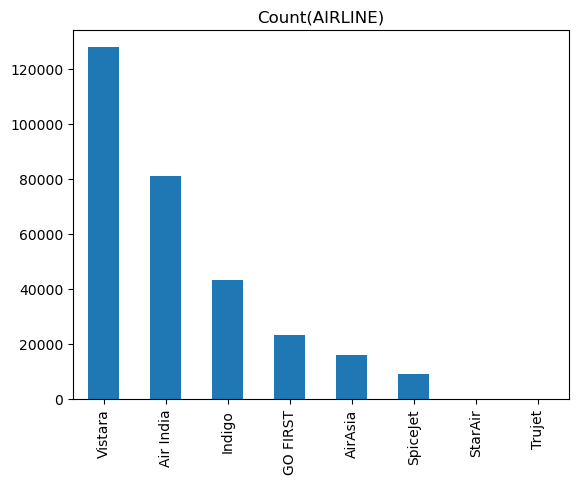

In [69]:
#BAR PLOT FOR EACH COLUMN
#AIRLINE
targ_cnt=df.AIRLINE.value_counts()
print('VISTARA ',targ_cnt[0])
print('AIR-INDIA',targ_cnt[1])
print('INDIGO',targ_cnt[2])
print('GO-FIRST',targ_cnt[3])
print('AIR-ASIA',targ_cnt[4])
print('SPICEJET',targ_cnt[5])
print('STARAIR',targ_cnt[6])
print('TRUJET',targ_cnt[7])
targ_cnt.plot(kind='bar',title='Count(AIRLINE)')
plt.show()

UK 127859
AI 80894
6E 43120
G8 23177
I5 16098
SG 9011
S5 61
2T 41


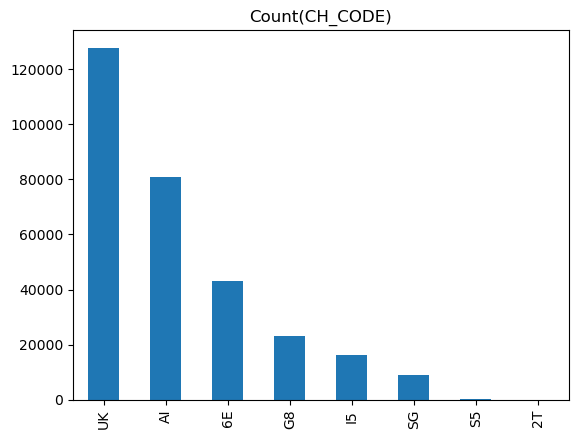

In [70]:
#CH_CODE
targ_cnt=df.CH_CODE.value_counts()
print('UK',targ_cnt[0])
print('AI',targ_cnt[1])
print('6E',targ_cnt[2])
print('G8',targ_cnt[3])
print('I5',targ_cnt[4])
print('SG',targ_cnt[5])
print('S5',targ_cnt[6])
print('2T',targ_cnt[7])
targ_cnt.plot(kind='bar',title='Count(CH_CODE)')
plt.show()

ECONOMY 206774
BUSINESS 93487


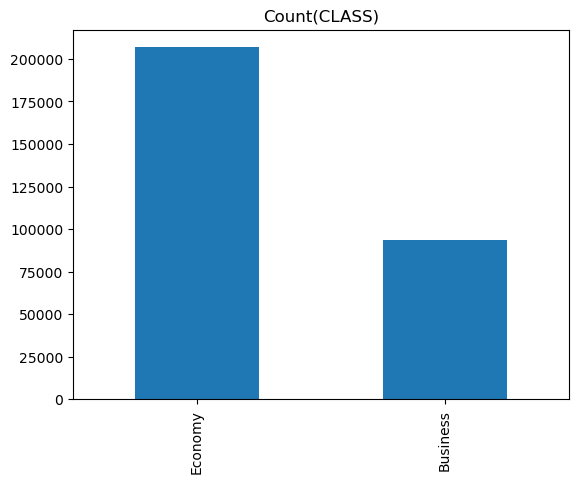

In [71]:
#CLASS
targ_cnt=df.CLASS.value_counts()
print('ECONOMY',targ_cnt[0])
print('BUSINESS',targ_cnt[1])
targ_cnt.plot(kind='bar',title='Count(CLASS)')
plt.show()

DELHI 61345
MUMBAI 60903
BANGALORE 52106
KOLKATA 46347
HYDERABAD 40860
CHENNAI 38700


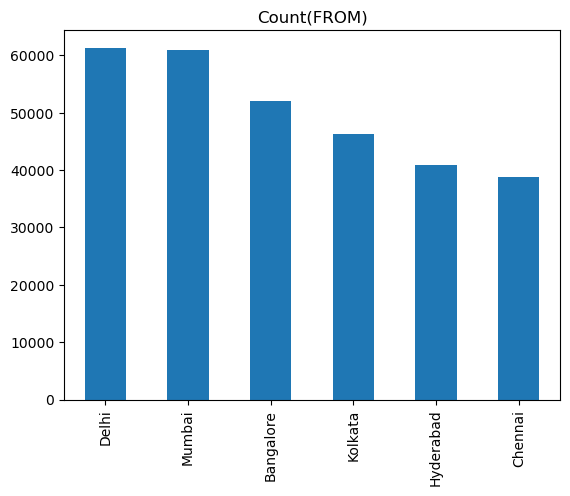

In [72]:
#FROM
targ_cnt=df.FROM.value_counts()
print('DELHI',targ_cnt[0])
print('MUMBAI',targ_cnt[1])
print('BANGALORE',targ_cnt[2])
print('KOLKATA',targ_cnt[3])
print('HYDERABAD',targ_cnt[4])
print('CHENNAI',targ_cnt[5])
targ_cnt.plot(kind='bar',title='Count(FROM)')
plt.show()

MUMBAI 59109
DELHI 57361
BANGALORE 51112
KOLKATA 49535
HYDERABAD 42776
CHENNAI 40368


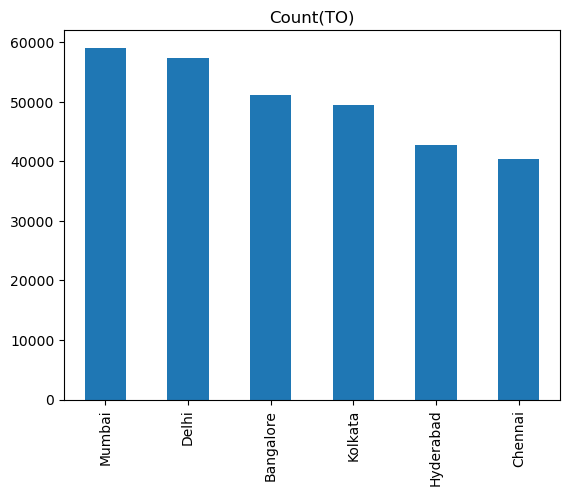

In [73]:
#TO
targ_cnt=df.TO.value_counts()
print('MUMBAI',targ_cnt[0])
print('DELHI',targ_cnt[1])
print('BANGALORE',targ_cnt[2])
print('KOLKATA',targ_cnt[3])
print('HYDERABAD',targ_cnt[4])
print('CHENNAI',targ_cnt[5])
targ_cnt.plot(kind='bar',title='Count(TO)')
plt.show()

0 36044
1 250929
2 13288


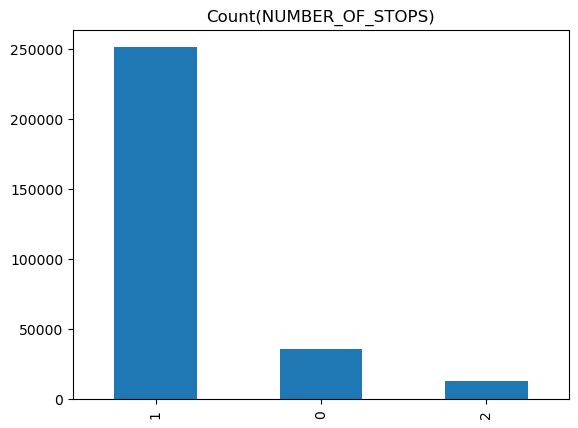

In [74]:
#NUMBER_OF_STOPS
targ_cnt=df.NUMBER_OF_STOPS.value_counts()
print('0',targ_cnt[0])
print('1',targ_cnt[1])
print('2',targ_cnt[2])
targ_cnt.plot(kind='bar',title='Count(NUMBER_OF_STOPS)')
plt.show()

<AxesSubplot:xlabel='AIRLINE', ylabel='Count'>

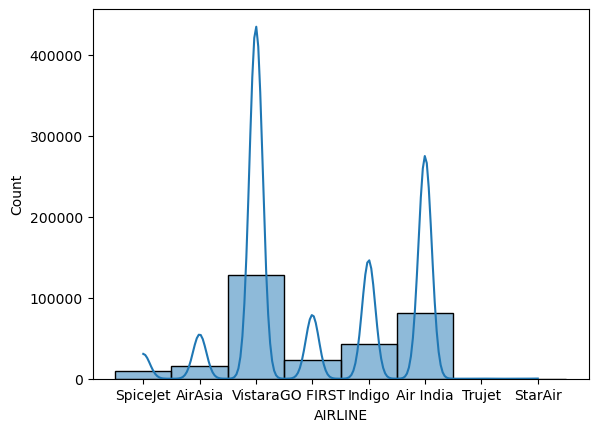

In [75]:
#Histogram for each column
#AIRLINE
sns.histplot(df.AIRLINE,kde=True)

<AxesSubplot:xlabel='NUM_CODE', ylabel='Count'>

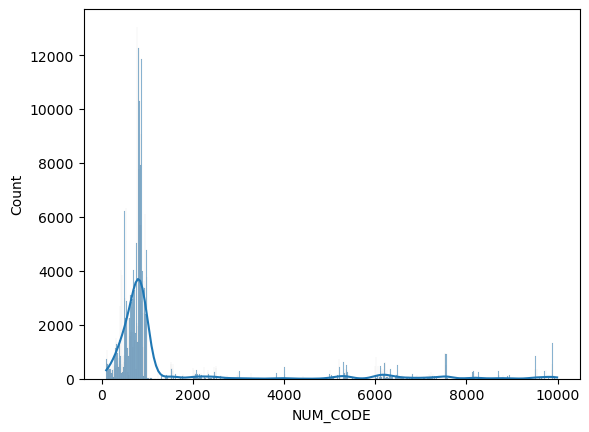

In [76]:
#NUM_CODE
sns.histplot(df.NUM_CODE,kde=True)

<AxesSubplot:xlabel='FROM', ylabel='Count'>

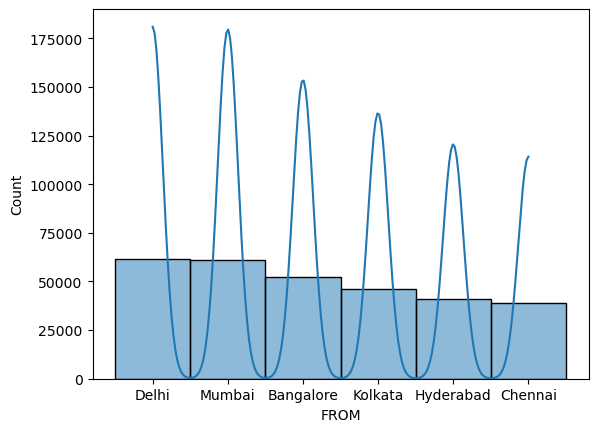

In [77]:
#FROM
sns.histplot(df.FROM,kde=True)

<AxesSubplot:xlabel='TIME_TAKEN', ylabel='Count'>

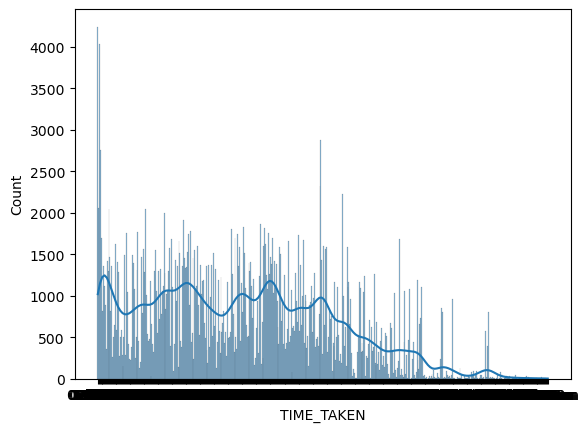

In [78]:
#TIME_TAKEN
sns.histplot(df.TIME_TAKEN,kde=True)

<AxesSubplot:xlabel='CLASS', ylabel='Count'>

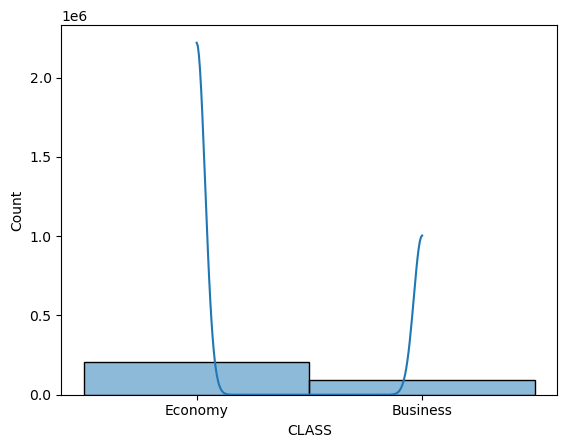

In [79]:
#CLASS
sns.histplot(df.CLASS,kde=True)

<AxesSubplot:xlabel='PRICE', ylabel='Count'>

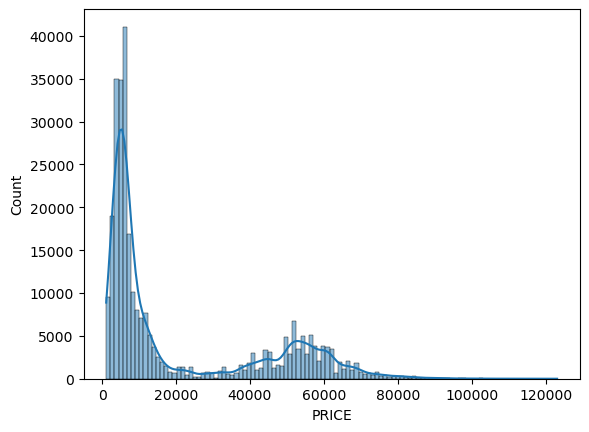

In [80]:
#Histogram for PRICE
sns.histplot(df.PRICE,kde=True)

## Bivariate Analysis

In [81]:
#Finding Correlation among Numerical Data
df[['PRICE','NUMBER_OF_STOPS']].corr()

,PRICE,NUMBER_OF_STOPS
PRICE,1.000000,0.119798
NUMBER_OF_STOPS,0.119798,1.000000


In [82]:
#Bi-variate analysis between one categorical numerical data
#AIRLINE AND PRICE
df.groupby(by="AIRLINE").agg("mean")[['PRICE']]

,PRICE
AIRLINE,
Air India,23506.647217
AirAsia,4091.072742
GO FIRST,5651.930578
Indigo,5324.216303
SpiceJet,6179.278881
StarAir,4932.655738
Trujet,3244.634146
Vistara,30396.536302


In [83]:
#FROM AND PRICE
df.groupby(by="FROM").agg("mean")[['PRICE']]

,PRICE
FROM,
Bangalore,21455.881875
Chennai,21995.339871
Delhi,18950.984758
Hyderabad,20133.244665
Kolkata,21746.235679
Mumbai,21481.713446


In [84]:
#TO AND PRICE
df.groupby(by="TO").agg("mean")[['PRICE']]

,PRICE
TO,
Bangalore,21578.100544
Chennai,21953.323969
Delhi,18436.553355
Hyderabad,20410.105152
Kolkata,21959.218754
Mumbai,21369.040197


In [85]:
#CLASS AND PRICE
df.groupby(by="CLASS").agg("mean")[['PRICE']]

,PRICE
CLASS,
Business,52540.081124
Economy,6571.190701


In [86]:
#TIME_TAKEN AND PRICE
df.groupby(by="TIME_TAKEN").agg("mean")[['PRICE']]

,PRICE
TIME_TAKEN,
00h 50m,1973.557692
00h 55m,2003.538462
01h 00m,2282.093199
01h 05m,2593.148342
01h 10m,2632.209375
...,...
47h 05m,17223.000000
47h 45m,31291.500000
49h 50m,20714.500000


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

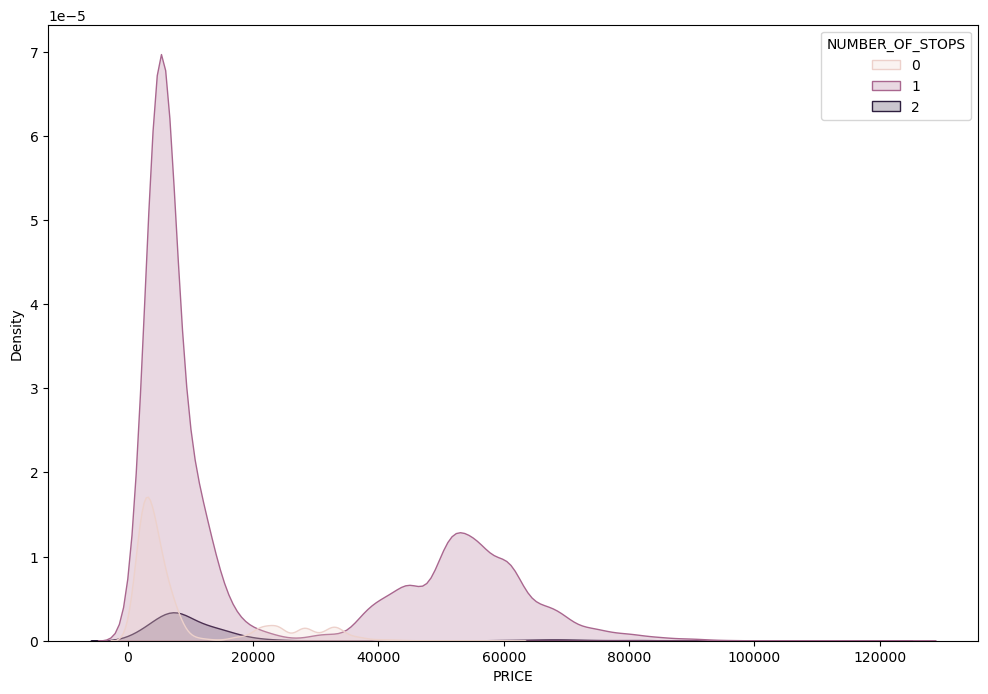

In [87]:
#kdeplot visualization for all numerical attributes with target attribute
plt.figure(figsize=(12,8))
sns.kdeplot(data=df, x= 'PRICE',hue='NUMBER_OF_STOPS',fill=True)

<AxesSubplot:>

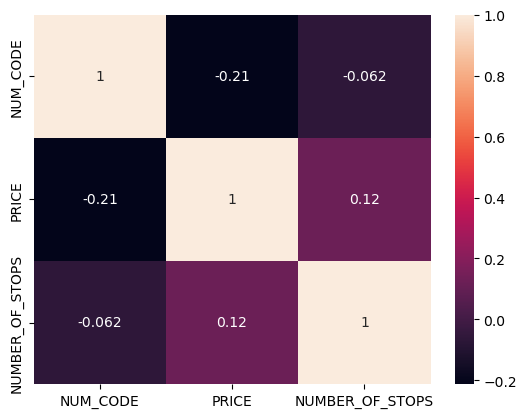

In [88]:
#heatmap
sns.heatmap(df.corr(), annot=True)

In [89]:
#CREATE A BACK-UP DATAFRAME  
df_back=df

In [90]:
df_back

,AIRLINE,CH_CODE,NUM_CODE,DEP_TIME,FROM,TIME_TAKEN,ARR_TIME,TO,PRICE,CLASS,NUMBER_OF_STOPS
0,SpiceJet,SG,8709,18:55,Delhi,02h 10m,21:05,Mumbai,5953,Economy,0
1,SpiceJet,SG,8157,06:20,Delhi,02h 20m,08:40,Mumbai,5953,Economy,0
2,AirAsia,I5,764,04:25,Delhi,02h 10m,06:35,Mumbai,5956,Economy,0
3,Vistara,UK,995,10:20,Delhi,02h 15m,12:35,Mumbai,5955,Economy,0
4,Vistara,UK,963,08:50,Delhi,02h 20m,11:10,Mumbai,5955,Economy,0
...,...,...,...,...,...,...,...,...,...,...,...
300256,Vistara,UK,822,09:45,Chennai,10h 05m,19:50,Hyderabad,69265,Business,1
300257,Vistara,UK,826,12:30,Chennai,10h 25m,22:55,Hyderabad,77105,Business,1
300258,Vistara,UK,832,07:05,Chennai,13h 50m,20:55,Hyderabad,79099,Business,1
300259,Vistara,UK,828,07:00,Chennai,10h 00m,17:00,Hyderabad,81585,Business,1


In [91]:
#Converting a Python object into a byte stream to store it in a FILE/database
import pickle
dbfile = open('dataframe', 'wb')      
# Source, Destination
pickle.dump(df_back, dbfile)                     
dbfile.close()

# ENCODING

In [92]:
# Check for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [93]:
#Print the categorical columns
print("Categorical columns:")
for column in categorical_columns:
    print(column)

Categorical columns:
AIRLINE
CH_CODE
DEP_TIME
FROM
TIME_TAKEN
ARR_TIME
TO
CLASS


In [94]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in all categorical columns.
for column in categorical_columns:
	df[column]= label_encoder.fit_transform(df[column])
  
#df['species'].unique()

In [95]:
#Head of the updated encoded dataframe
df.head()

,AIRLINE,CH_CODE,NUM_CODE,DEP_TIME,FROM,TIME_TAKEN,ARR_TIME,TO,PRICE,CLASS,NUMBER_OF_STOPS
0,4,6,8709,190,2,16,230,5,5953,1,0
1,4,6,8157,40,2,18,81,5,5953,1,0
2,1,4,764,17,2,16,56,5,5956,1,0
3,7,7,995,88,2,17,128,5,5955,1,0
4,7,7,963,70,2,18,111,5,5955,1,0


In [97]:
#Tail of the updated encoded dataframe
df_back

,AIRLINE,CH_CODE,NUM_CODE,DEP_TIME,FROM,TIME_TAKEN,ARR_TIME,TO,PRICE,CLASS,NUMBER_OF_STOPS
0,4,6,8709,190,2,16,230,5,5953,1,0
1,4,6,8157,40,2,18,81,5,5953,1,0
2,1,4,764,17,2,16,56,5,5956,1,0
3,7,7,995,88,2,17,128,5,5955,1,0
4,7,7,963,70,2,18,111,5,5955,1,0
...,...,...,...,...,...,...,...,...,...,...,...
300256,7,7,822,81,1,116,215,3,69265,0,1
300257,7,7,826,113,1,120,252,3,77105,0,1
300258,7,7,832,49,1,162,228,3,79099,0,1
300259,7,7,828,48,1,115,181,3,81585,0,1


# Splitting into dependent and independent variables

In [98]:
X = df.drop(columns=['PRICE'])  # Independent variables
y = df['PRICE']  # Dependent variable

# Printing the output
# we print the first few entries of both X and y using the head() function to display the output.
print("Independent Variables (X):")
print(X.head())

print("\nDependent Variable (y):")
print(y.head())


Independent Variables (X):
   AIRLINE  CH_CODE  NUM_CODE  DEP_TIME  FROM  TIME_TAKEN  ARR_TIME  TO  \
0        4        6      8709       190     2          16       230   5   
1        4        6      8157        40     2          18        81   5   
2        1        4       764        17     2          16        56   5   
3        7        7       995        88     2          17       128   5   
4        7        7       963        70     2          18       111   5   

   CLASS  NUMBER_OF_STOPS  
0      1                0  
1      1                0  
2      1                0  
3      1                0  
4      1                0  

Dependent Variable (y):
0    5953
1    5953
2    5956
3    5955
4    5955
Name: PRICE, dtype: int32


# Splitting the data into train and test sets

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Printing the shapes of the train and test sets
print("Train set shape:")
print(X_train.shape, y_train.shape)

print("\nTest set shape:")
print(X_test.shape, y_test.shape)


Train set shape:
(240208, 10) (240208,)

Test set shape:
(60053, 10) (60053,)


In [100]:
#Dataframe Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   AIRLINE          300261 non-null  int32
 1   CH_CODE          300261 non-null  int32
 2   NUM_CODE         300261 non-null  int64
 3   DEP_TIME         300261 non-null  int32
 4   FROM             300261 non-null  int32
 5   TIME_TAKEN       300261 non-null  int32
 6   ARR_TIME         300261 non-null  int32
 7   TO               300261 non-null  int32
 8   PRICE            300261 non-null  int32
 9   CLASS            300261 non-null  int32
 10  NUMBER_OF_STOPS  300261 non-null  int32
dtypes: int32(10), int64(1)
memory usage: 13.7 MB


In [101]:
#Size and Shape of Train and Test Datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240208, 10)
(60053, 10)
(240208,)
(60053,)


# Ensemble Techniques

In [102]:
#Ensemble Techniques to check which one is most accurate 
lr = LinearRegression()
log_r=LogisticRegression()
dt1 = DecisionTreeRegressor()
dt2 = DecisionTreeRegressor()
rf = RandomForestRegressor()

## LINEAR REGRESSION

In [103]:
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [104]:
y_pred_lr

array([ 8629.60845511,  6028.74819823,  -168.84396004, ...,
        8354.31177912, 53792.11238722,   878.76462524])

In [105]:
#CALCULATING ACCURACY , MEAN SQUARED ERROR ,ROOT MEAN SQUARE ERROR, R-SQUARED ERROR AND MEAN ABSOLUTE ERROR
score = round((lr.score(X_test, y_test)*100), 2)
mse = round(mean_squared_error(y_test, y_pred_lr), 3)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred_lr)), 3)
r2 = round(r2_score(y_test, y_pred_lr), 3)
mae = mean_absolute_error(y_test, y_pred_lr)
metrics_lr = pd.DataFrame({
        'Model Name': 'Linear Regression',
        'Accuracy(%)': [score],
        'Mean Squared Error (MSE)': [mse],
        'Root Mean Squared Error (RMSE)': [rmse],
        'R-squared (R2-Score)': [r2],
        'Mean Absolute Error (MAE)': [mae]
    })

In [106]:
#Displaying Metrics
metrics_lr

,Model Name,Accuracy(%),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (R2-Score),Mean Absolute Error (MAE)
0,Linear Regression,90.16,50430326.94,7101.431,0.902,4803.384011


In [107]:
#GENERATES RANDOM NUMBER SAMPLES
df = df.sample(frac = 1)

## DECISION TREE BEST FIT

In [108]:
dt1 = DecisionTreeRegressor(max_depth=None, min_samples_split=10, min_samples_leaf= 2)
dt1.fit(X_train, y_train)

y_pred_dt = dt1.predict(X_test)
y_pred_dt

array([ 6636.        , 10030.2       ,  4500.        , ...,
        9055.81818182, 44986.54285714,  3691.        ])

In [109]:
#CALCULATING ACCURACY , MEAN SQUARED ERROR ,ROOT MEAN SQUARE ERROR, R-SQUARED ERROR AND MEAN ABSOLUTE ERROR
score = round((dt1.score(X_test, y_test)*100), 2)
mse = round(mean_squared_error(y_test, y_pred_dt), 3)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred_dt)), 3)
r2 = round(r2_score(y_test, y_pred_dt), 3)
mae = mean_absolute_error(y_test, y_pred_dt)
metrics_dt1 = pd.DataFrame({
        'Model Name': 'Decision Tree Best Fit',
        'Accuracy(%)': [score],
        'Mean Squared Error (MSE)': [mse],
        'Root Mean Squared Error (RMSE)': [rmse],
        'R-squared (R2-Score)': [r2],
        'Mean Absolute Error (MAE)': [mae]
    })

In [110]:
#Displaying Metrics
metrics_dt1

,Model Name,Accuracy(%),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (R2-Score),Mean Absolute Error (MAE)
0,Decision Tree Best Fit,97.69,1.182859e+07,3439.272,0.977,2106.642238


## DECISION TREE BASIC FIT

In [111]:
dt2 = DecisionTreeRegressor(max_depth=5, min_samples_split=10)
dt2.fit(X_train, y_train)

y_pred = dt2.predict(X_test)
y_pred

array([ 7515.68732741,  7314.74598816,  4833.86823303, ...,
        8983.44261076, 53122.64179539,  3969.14435656])

In [112]:
#CALCULATING ACCURACY , MEAN SQUARED ERROR ,ROOT MEAN SQUARE ERROR, R-SQUARED ERROR AND MEAN ABSOLUTE ERROR
score = round((dt2.score(X_test, y_test)*100), 2)
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)
r2 = round(r2_score(y_test, y_pred), 3)
mae = mean_absolute_error(y_test, y_pred)
metrics_dt2 = pd.DataFrame({
        'Model Name': 'Decision Tree Basic Fit',
        'Accuracy(%)': [score],
        'Mean Squared Error (MSE)': [mse],
        'Root Mean Squared Error (RMSE)': [rmse],
        'R-squared (R2-Score)': [r2],
        'Mean Absolute Error (MAE)': [mae]
    })

In [113]:
#Displaying Metrics
metrics_dt2

,Model Name,Accuracy(%),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (R2-Score),Mean Absolute Error (MAE)
0,Decision Tree Basic Fit,93.76,3.200600e+07,5657.384,0.938,3752.367241


In [114]:
#DISPLAYING PRICE OF THE INDEX 60052
y_pred[60052]

3969.1443565561303

## RANDOM FOREST

In [115]:
rf = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=75)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_rf

array([ 6596.56419714,  9079.97032799,  4532.05542783, ...,
        9035.86733751, 45025.4311191 ,  3767.35759007])

In [116]:
#CALCULATING ACCURACY , MEAN SQUARED ERROR ,ROOT MEAN SQUARE ERROR, R-SQUARED ERROR AND MEAN ABSOLUTE ERROR
score = round((rf.score(X_test, y_test)*100), 2)
mse = round(mean_squared_error(y_test, y_pred_rf), 3)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred_rf)), 3)
r2 = round(r2_score(y_test, y_pred_rf), 3)
mae = mean_absolute_error(y_test, y_pred_rf)
metrics_rf = pd.DataFrame({
        'Model Name': 'Random Forest',
        'Accuracy(%)': [score],
        'Mean Squared Error (MSE)': [mse],
        'Root Mean Squared Error (RMSE)': [rmse],
        'R-squared (R2-Score)': [r2],
        'Mean Absolute Error (MAE)': [mae]
    })

In [117]:
#Displaying Metrics
metrics_rf

,Model Name,Accuracy(%),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (R2-Score),Mean Absolute Error (MAE)
0,Random Forest,97.74,1.159270e+07,3404.805,0.977,2105.297252


# COMPARATIVE ANALYSIS OF ALL 4 TECHNIQUES(Model Selection)

In [118]:
#CONCLUSION-RANDOM FOREST HAS MOST ACCURACY
all_results = pd.concat([metrics_lr,metrics_dt1,metrics_dt2,metrics_rf], ignore_index=True)
all_results

,Model Name,Accuracy(%),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (R2-Score),Mean Absolute Error (MAE)
0,Linear Regression,90.16,5.043033e+07,7101.431,0.902,4803.384011
1,Decision Tree Best Fit,97.69,1.182859e+07,3439.272,0.977,2106.642238
2,Decision Tree Basic Fit,93.76,3.200600e+07,5657.384,0.938,3752.367241
3,Random Forest,97.74,1.159270e+07,3404.805,0.977,2105.297252


In [120]:
#ENCODED BACK-UP DATAFRAME
df_back

,AIRLINE,CH_CODE,NUM_CODE,DEP_TIME,FROM,TIME_TAKEN,ARR_TIME,TO,PRICE,CLASS,NUMBER_OF_STOPS
0,4,6,8709,190,2,16,230,5,5953,1,0
1,4,6,8157,40,2,18,81,5,5953,1,0
2,1,4,764,17,2,16,56,5,5956,1,0
3,7,7,995,88,2,17,128,5,5955,1,0
4,7,7,963,70,2,18,111,5,5955,1,0
...,...,...,...,...,...,...,...,...,...,...,...
300256,7,7,822,81,1,116,215,3,69265,0,1
300257,7,7,826,113,1,120,252,3,77105,0,1
300258,7,7,832,49,1,162,228,3,79099,0,1
300259,7,7,828,48,1,115,181,3,81585,0,1


# PRICE PREDICTION

In [121]:
#VALUES TO PREDICT PRICE
lst=[['Vistara','UK','963','08:50','Delhi','02h 20m','11:10','Mumbai','Economy','0']]
#CREATE NEW DATAFRAME AND ADDED COLUMN HEADINGS
df_test = pd.DataFrame(lst,columns =['AIRLINE', 'CH_CODE','NUM_CODE','DEP_TIME', 'FROM', 'TIME_TAKEN', 'ARR_TIME','TO','CLASS','NUMBER_OF_STOPS'])

In [122]:
df_test

,AIRLINE,CH_CODE,NUM_CODE,DEP_TIME,FROM,TIME_TAKEN,ARR_TIME,TO,CLASS,NUMBER_OF_STOPS
0,Vistara,UK,963,08:50,Delhi,02h 20m,11:10,Mumbai,Economy,0


In [123]:
import pickle
dbfile = open('dataframe', 'rb')     
df_back_final = pickle.load(dbfile)
df_back_final=pd.DataFrame(df_back_final)
df_back_final_user=pd.concat([df_back_final,df_test])
df_back_final_user
df_back_final_user=df_back_final_user.drop(columns=['PRICE'])

label_encoder = preprocessing.LabelEncoder()
for column in categorical_columns:
	df_back_final_user[column]= label_encoder.fit_transform(df_back_final_user[column])
df_test_final=df_back_final_user.tail(1)
df_test_final

rf = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=75)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(df_test_final)
y_pred_rf

dt1 = DecisionTreeRegressor(max_depth=None, min_samples_split=10, min_samples_leaf= 2)
dt1.fit(X_train, y_train)

y_pred_dt = dt1.predict(df_test_final)
y_pred_dt

array([3893.05555556])

In [127]:
def prediction(lst):
    df_test = pd.DataFrame(lst,columns =['AIRLINE', 'CH_CODE','NUM_CODE','DEP_TIME', 'FROM', 'TIME_TAKEN', 'ARR_TIME','TO','CLASS','NUMBER_OF_STOPS'])
    df_test
    import pickle
    dbfile = open('dataframe', 'rb')     
    df_back_final = pickle.load(dbfile)
    df_back_final=pd.DataFrame(df_back_final)
    df_back_final_user=pd.concat([df_back_final,df_test])
    df_back_final_user
    df_back_final_user=df_back_final_user.drop(columns=['PRICE'])
    
    label_encoder = preprocessing.LabelEncoder()
    for column in categorical_columns:
        df_back_final_user[column]= label_encoder.fit_transform(df_back_final_user[column])
    df_test_final=df_back_final_user.tail(1)
    df_test_final
    
    rf = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=75)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(df_test_final)
    return y_pred_rf
    

In [128]:
#USER ENTRY TO PREDICT PRICE
lst=[['Vistara','UK','963','08:50','Delhi','02h 20m','11:10','Mumbai','Economy','0']]

### Value Prediction 

In [129]:
#PRICE PREDICTION
prediction(lst)

array([3910.39211662])

In [130]:
#CLOSING THE MODEL AFTER SAVING AND LOADING
import pickle
model = open('model', 'wb')
pickle.dump(prediction,model)
model.close()